In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix

plt.style.use("../mpl styles/dracula.mplstyle")

In [94]:
def f(w, X, b):
    return X @ w + b

def sigmoid(w, X, b):
    z = f(w, X, b)
    return 1 / (1 + np.exp(-z))

def line_equation(model, X, df):
    y = model.predict(X)
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
    plt.plot(X, y)

def sigmoid_equation(model, X, df):
    y = model.predict_proba(X)[:, 1]
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
    plt.plot(X, y)
    
def get_misclassified_examples(X, y_true, y_pred):
    misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred]
    misclassified_X = X.iloc[misclassified_indices].copy()  # copy to avoid SettingWithCopyWarning
    misclassified_X['predicted'] = pd.Series(y_pred)[misclassified_indices].values
    return misclassified_X

$
    \sigma(w, X, b) = \frac{1}{1 + e^{-f(w, X, b)}} = \frac{1}{1 + e^{-(Xw + b)}}
$

In [71]:
age = np.arange(37)
adult = age > 18

age[-1] = 100
adult[-1] = 0

df = pd.DataFrame({"age": age, "adult": adult})

In [72]:
features = ["age"]
target = "adult"

X, y = df[features], df[target]

linear = LinearRegression()
logistic = LogisticRegression()

linear.fit(X, y)
logistic.fit(X, y);

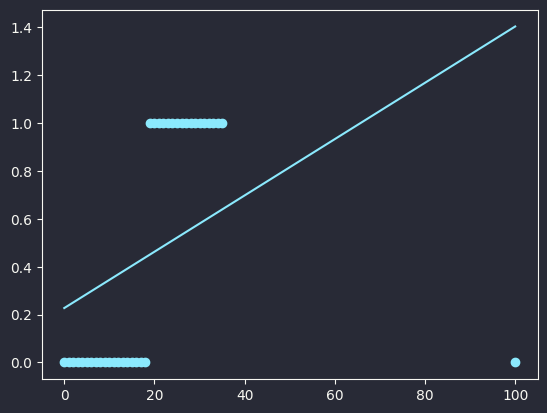

In [73]:
line_equation(linear, X, df)

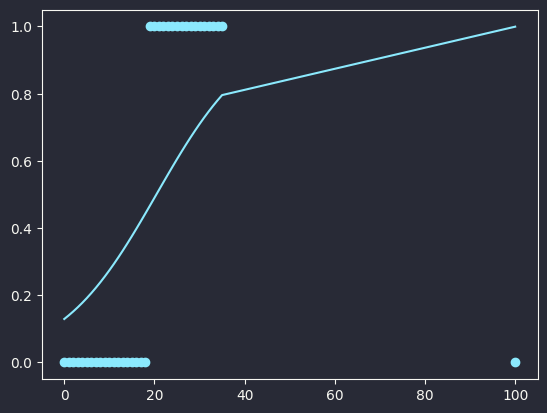

In [74]:
sigmoid_equation(logistic, X, df)

In [78]:
linear_y_pred = linear.predict(X).round()
logistic_y_pred = logistic.predict(X)

cm_linear = confusion_matrix(y, linear_y_pred)
cm_logistic = confusion_matrix(y, logistic_y_pred)

Text(0.5, 1.0, 'Linear Model')

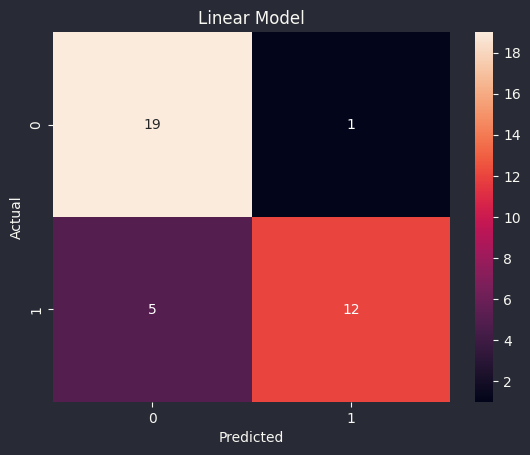

In [79]:
sns.heatmap(cm_linear, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Linear Model")

Text(0.5, 1.0, 'Logistic Model')

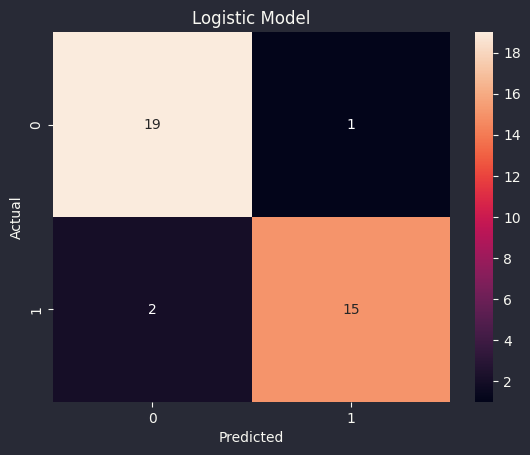

In [80]:
sns.heatmap(cm_logistic, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Model")

In [95]:
get_misclassified_examples(df, y, logistic_y_pred)

,age,adult,predicted
19,19,True,False
20,20,True,False
36,100,False,True


In [103]:
get_misclassified_examples(df, y, linear_y_pred)

,age,adult,predicted
19,19,True,0.0
20,20,True,0.0
21,21,True,0.0
22,22,True,0.0
23,23,True,0.0
36,100,False,1.0
